<a href="https://colab.research.google.com/github/Imran012x/Hilsha_CoLab/blob/main/1_CNN%2Btransfer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Lab -->> Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")


#Data Preprocessing

In [3]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data_fish_224_12k.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
ilish_pic= os.listdir('/content/ilish/')
print(ilish_pic[0:5])
print(ilish_pic[-5:])
chandana_pic= os.listdir('/content/chandana/')
sardin_pic= os.listdir('/content/sardin/')
sardinella_pic= os.listdir('/content/sardinella/')
punctatus_pic= os.listdir('/content/punctatus/')

['977.webp', '327.webp', '1246.webp', '2809.webp', '2231.webp']
['1294.webp', '875.webp', '2973.webp', '1250.webp', '487.webp']


In [6]:
print('ilish   images:', len(ilish_pic))
print('chandana  images:', len(chandana_pic))
print('sardin   images:', len(sardin_pic))
print('sardinella  images:', len(sardinella_pic))
print('punctatus images:', len(sardinella_pic))

ilish   images: 3000
chandana  images: 2000
sardin   images: 3000
sardinella  images: 2000
punctatus images: 2000


In [7]:
ilish_pic_labels = [0]*len(ilish_pic)
chandana_pic_labels = [1]*len(chandana_pic)
sardin_pic_labels = [2]*len(sardin_pic)
sardinella_pic_labels = [3]*len(sardinella_pic)
punctatus_pic_labels = [4]*len(punctatus_pic)


print(ilish_pic_labels[0:5])

print(chandana_pic_labels[0:5])

print(sardin_pic_labels[0:5])

print(sardinella_pic_labels[0:5])

print(punctatus_pic_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[4, 4, 4, 4, 4]


In [8]:
labels = ilish_pic_labels + chandana_pic_labels + sardin_pic_labels + sardinella_pic_labels + punctatus_pic_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

12000
[0, 0, 0, 0, 0]
[4, 4, 4, 4, 4]


In [9]:
import random
import os
from PIL import Image
import numpy as np

# Parameters (set different numbers for each class)
ilish_image_number = len(ilish_pic)
chandana_image_number = len(chandana_pic)
sardin_image_number = len(sardin_pic)
sardinella_image_number = len(sardinella_pic)
punctatus_image_number = len(punctatus_pic)


# Initialize the list to store the images
data = []

def process_images(image_path, image_number):
    image_labels = sorted(os.listdir(image_path))  # Ensure images are in order
    random.shuffle(image_labels)  # Shuffle to get random ones
    selected_images = []
    for img_file in image_labels[:image_number]:
        image = Image.open(os.path.join(image_path, img_file))
        image = image.resize((224, 224))
        image = image.convert('RGB')
        image = np.array(image)
        selected_images.append(image)
    return selected_images

# Process images for each category
data.extend(process_images('/content/ilish/', ilish_image_number))
data.extend(process_images('/content/chandana/', chandana_image_number))
data.extend(process_images('/content/sardin/', sardin_image_number))
data.extend(process_images('/content/sardinella/', sardinella_image_number))
data.extend(process_images('/content/punctatus/', punctatus_image_number))

In [10]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

Class counts: {0: 3000, 1: 2000, 2: 3000, 3: 2000, 4: 2000}
(12000, 224, 224, 3)
(12000,)


(12000, 224, 224, 3) (9600, 224, 224, 3) (2400, 224, 224, 3)


array([[[155, 162, 175],
        [155, 161, 175],
        [153, 160, 173],
        ...,
        [165, 173, 186],
        [162, 171, 184],
        [161, 171, 183]],

       [[154, 161, 174],
        [153, 160, 173],
        [152, 159, 172],
        ...,
        [165, 173, 186],
        [162, 171, 183],
        [161, 170, 182]],

       [[151, 158, 171],
        [151, 158, 171],
        [151, 158, 171],
        ...,
        [163, 171, 184],
        [161, 169, 181],
        [159, 168, 179]],

       ...,

       [[140, 147, 161],
        [140, 146, 161],
        [138, 145, 160],
        ...,
        [168, 175, 190],
        [170, 176, 192],
        [170, 177, 193]],

       [[141, 148, 163],
        [141, 147, 163],
        [139, 146, 161],
        ...,
        [169, 176, 190],
        [172, 178, 193],
        [174, 180, 196]],

       [[142, 148, 164],
        [141, 148, 163],
        [140, 146, 162],
        ...,
        [170, 176, 190],
        [173, 179, 194],
        [177, 183, 198]]], dtype=uint8)
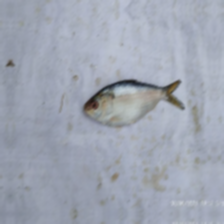

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0]

#Optuna-Hyper parameter Training

In [12]:
# !pip install optuna
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#Unsupervised Learning

In [13]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import zipfile
# import os
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet50 import preprocess_input

# # Set Random Seed for Reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# # 📌 Extract the ZIP File
# zip_file = "/content/drive/MyDrive/mixed.zip"  # Update this path
# extract_folder = "butterfly_dataset"

# if not os.path.exists(extract_folder):
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(extract_folder)

# # 📌 Generate Labels from Filenames
# image_folder = "butterfly_dataset/mixed"  # Path where images are stored

# # Get all image filenames
# image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))]



# # Load images and preprocess them for feature extraction
# img_size = (224, 224)
# images = []
# for img_file in image_files:
#     img_path = os.path.join(image_folder, img_file)
#     img = load_img(img_path, target_size=img_size)
#     img_array = img_to_array(img)  # Convert image to array
#     img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
#     images.append(img_array)

# # Convert list of images into a numpy array
# images = np.array(images)

# # Ensure the shape is correct (num_images, height, width, channels)
# print(f"Image shape: {images.shape}")

# # 📌 Use Pre-trained ResNet50 for Feature Extraction
# resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# resnet_model.trainable = False  # Freeze the layers

# # Extract features from the images
# features = resnet_model.predict(np.array(images), batch_size=32)

# # Flatten the features for clustering
# features_flat = features.reshape(features.shape[0], -1)



# # 📌 Apply KMeans Clustering to Group Images into Clusters (Pseudo-Labels)
# num_clusters = 4  # Set the number of clusters (adjust as needed)
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# pseudo_labels = kmeans.fit_predict(features_flat)

# # 📌 Create a DataFrame with the pseudo-labels
# df = pd.DataFrame({'filename': image_files, 'label': pseudo_labels})

# # Split into train and validation sets (80% train, 20% validation)
# from sklearn.model_selection import train_test_split
# train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# # 📌 Image Data Augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # 📌 Load Data from DataFrame (Single Folder)
# batch_size = 32

# train_df["label"] = train_df["label"].astype(str)
# val_df["label"] = val_df["label"].astype(str)

# train_generator = datagen.flow_from_dataframe(
#     train_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# val_generator = datagen.flow_from_dataframe(
#     val_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # 📌 CNN Model Definition
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.3),
#     Dense(num_clusters, activation='softmax')  # Number of clusters as output classes
# ])

# # 📌 Compile the Model
# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # 📌 Train the Model
# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=100, batch_size=batch_size, verbose=1)

# # 📌 Evaluate the Model
# val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# # 📌 Plot Training vs Validation Accuracy/Loss
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training & Validation Accuracy")

# plt.subplot(1,2,2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training & Validation Loss")
# plt.show()

# # 📌 Generate Predictions for Test Data
# y_true = val_generator.classes
# y_pred = np.argmax(model.predict(val_generator), axis=1)

# # 📌 Confusion Matrix & Performance Metrics
# conf_matrix = confusion_matrix(y_true, y_pred)
# acc = accuracy_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# # 📌 Plot Confusion Matrix Heatmap
# plt.figure(figsize=(6,5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# # 📌 Classification Report
# print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# # 📌 Save Model
# model.save("butterfly_classifier.h5")


In [14]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import cv2
# import os
# from tensorflow.keras.preprocessing import image
# from google.colab import files  # Use this for Google Colab

# # 📌 Load the trained model
# model = tf.keras.models.load_model("butterfly_classifier.h5")

# # 📌 Define class names (must match the folder names used during training)
# class_names = ['common', 'painted', 'red_based', 'red_spot']  # Modify if needed

# # 📌 Function to Upload & Predict
# def upload_and_predict():
#     uploaded = files.upload()  # Opens a file uploader dialog

#     for filename in uploaded.keys():
#         # Load and preprocess the image
#         img_path = filename
#         img = image.load_img(img_path, target_size=(224, 224))  # Resize image
#         img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
#         img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

#         # 📌 Make Prediction
#         prediction = model.predict(img_array)
#         predicted_class = np.argmax(prediction)  # Get the class index
#         class_label = class_names[predicted_class]

#         # 📌 Display Image with Prediction
#         plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
#         plt.title(f"Predicted: {class_label}")
#         plt.axis("off")
#         plt.show()

#         print(f"🔹 Model Prediction: {class_label} (Confidence: {max(prediction[0]) * 100:.2f}%)")

# # 📌 Run the function
# upload_and_predict()

#Ensemble Learning

##1.[Resnet50+Inception+EfficientNet]

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4307 - loss: 1.5380

240/240 ━━━━━━━━━━━━━━━━━━━━ 36s 82ms/step - accuracy: 0.4310 - loss: 1.5370 - val_accuracy: 0.2573 - val_loss: 1.9822 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6404 - loss: 0.9777

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.6406 - loss: 0.9772 - val_accuracy: 0.4276 - val_loss: 1.9761 - learning_rate: 1.0000e-04
Epoch 3/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7301 - loss: 0.7543

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.7302 - loss: 0.7542 - val_accuracy: 0.6693 - val_loss: 1.0778 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7731 - loss: 0.6264 - val_accuracy: 0.3823 - val_loss: 3.6137 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7986 - loss: 0.5905 - val_accuracy: 0.3812 - val_loss: 4.1379 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8325 - loss: 0.4991 - val_accuracy: 0.4729 - val_loss: 1.8699 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8344 - loss: 0.4757 - val_accuracy: 0.4042 - val_loss: 2.7358 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8452 - loss: 0.4164 - val_accuracy: 0.4573 - val_loss: 2.5837 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accurac

240/240 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.5445 - loss: 1.2527 - val_accuracy: 0.8729 - val_loss: 0.4057 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8732 - loss: 0.3490

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8733 - loss: 0.3489 - val_accuracy: 0.9146 - val_loss: 0.2482 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9383 - loss: 0.1869

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9383 - loss: 0.1869 - val_accuracy: 0.9229 - val_loss: 0.2358 - learning_rate: 1.0000e-04
Epoch 4/10
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9608 - loss: 0.1214

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9608 - loss: 0.1215 - val_accuracy: 0.9234 - val_loss: 0.2135 - learning_rate: 1.0000e-04
Epoch 5/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9764 - loss: 0.0742

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9764 - loss: 0.0742 - val_accuracy: 0.9443 - val_loss: 0.1750 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9839 - loss: 0.0560 - val_accuracy: 0.9417 - val_loss: 0.2044 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9920 - loss: 0.0305

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9920 - loss: 0.0305 - val_accuracy: 0.9531 - val_loss: 0.1644 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9916 - loss: 0.0295 - val_accuracy: 0.9448 - val_loss: 0.1884 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9521 - val_loss: 0.1748 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9354 - val_loss: 0.2456 - learning_rate: 1.0000e-04
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.2112 - loss: 2.0705 - val_accuracy: 0.2776 - val_loss: 1.7006 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.2279 - loss: 1.9035 - val_accuracy: 0.2396 - val_loss: 1.6405 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.

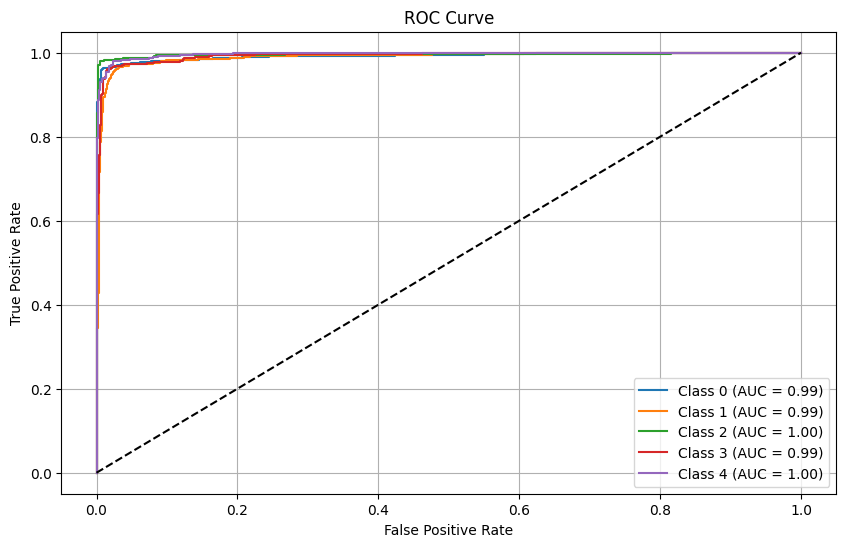

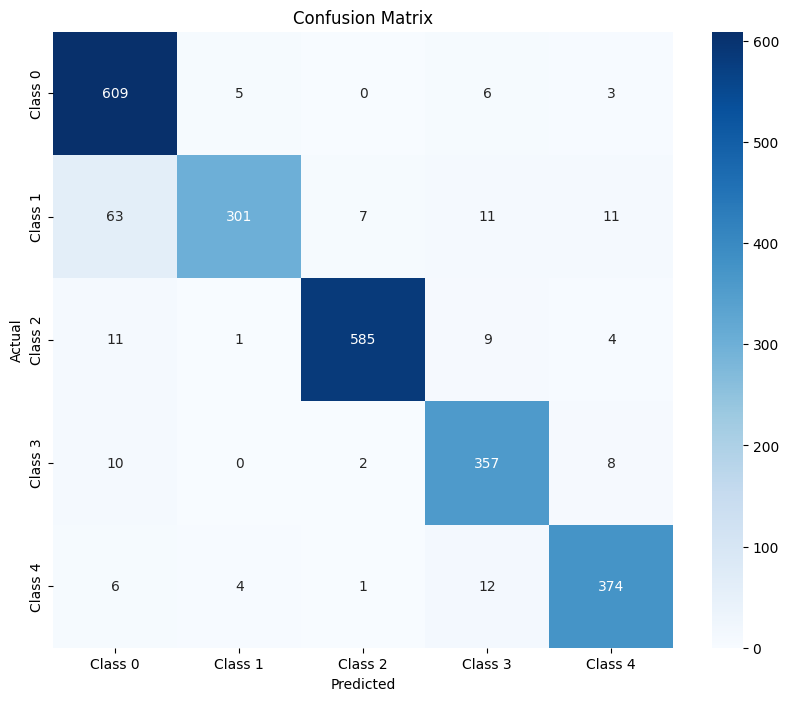

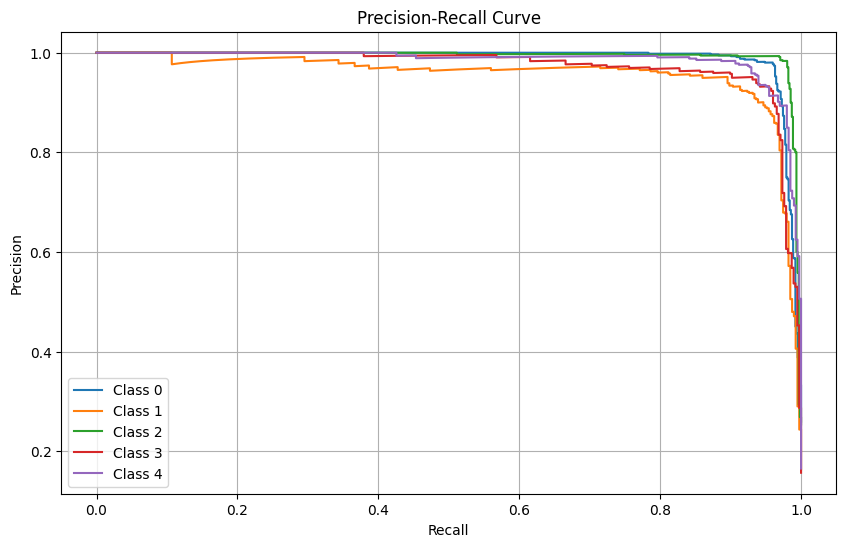

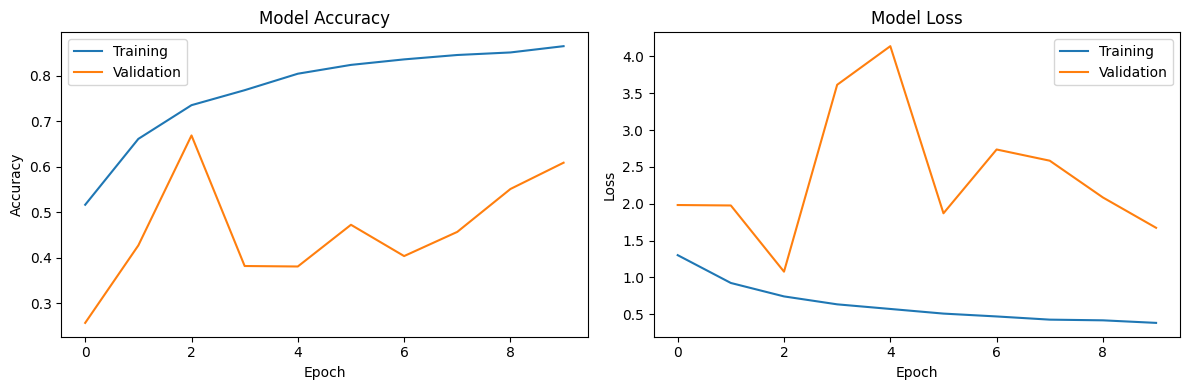


Final Model Performance:
Test Accuracy: 0.9275
F1 Score: 0.9265
Final predictions evaluated.


In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models
resnet_model = create_model(ResNet50)
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

inception_model = create_model(InceptionV3)
history_inception = inception_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

efficientnet_model = create_model(EfficientNetB0)
history_efficientnet = efficientnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models (probabilities from softmax)
resnet_preds_prob = resnet_model.predict(X_test_scaled)
inception_preds_prob = inception_model.predict(X_test_scaled)
efficientnet_preds_prob = efficientnet_model.predict(X_test_scaled)

# Ensure that all predictions have the same shape
assert resnet_preds_prob.shape == inception_preds_prob.shape == efficientnet_preds_prob.shape, "Prediction shapes do not match!"

# Average the predictions from all models
averaged_preds_prob = (resnet_preds_prob + inception_preds_prob + efficientnet_preds_prob) / 3

# Get final predicted classes (argmax of averaged probabilities)
final_preds = np.argmax(averaged_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations and Metrics
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, averaged_preds_prob, history_resnet)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")


2.[Vgg16+Inception+EfficientNet]

Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4384 - loss: 1.5442

240/240 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.4390 - loss: 1.5425 - val_accuracy: 0.2937 - val_loss: 2.2809 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6476 - loss: 0.9844

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.6478 - loss: 0.9839 - val_accuracy: 0.6552 - val_loss: 0.9625 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7093 - loss: 0.7880 - val_accuracy: 0.2484 - val_loss: 2.7959 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7644 - loss: 0.6614 - val_accuracy: 0.4875 - val_loss: 2.8798 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7894 - loss: 0.6087 - val_accuracy: 0.5047 - val_loss: 1.6461 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8202 - loss: 0.5069 - val_accuracy: 0.4573 - val_loss: 1.8107 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8437 - loss: 0.4581 - val_accuracy: 0.5078 - val_loss: 2.1851 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accurac

240/240 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4839 - loss: 1.4319 - val_accuracy: 0.8474 - val_loss: 0.4441 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8776 - loss: 0.3716 - val_accuracy: 0.8401 - val_loss: 0.4482 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9331 - loss: 0.1973

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9332 - loss: 0.1973 - val_accuracy: 0.8984 - val_loss: 0.3179 - learning_rate: 1.0000e-04
Epoch 4/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9579 - loss: 0.1274

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9579 - loss: 0.1273 - val_accuracy: 0.9187 - val_loss: 0.2723 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9717 - loss: 0.0810

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9717 - loss: 0.0811 - val_accuracy: 0.9448 - val_loss: 0.1625 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9856 - loss: 0.0538 - val_accuracy: 0.9333 - val_loss: 0.2095 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9886 - loss: 0.0394 - val_accuracy: 0.9104 - val_loss: 0.2889 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9411 - val_loss: 0.2068 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9917 - loss: 0.0276 - val_accuracy: 0.9344 - val_loss: 0.2038 - learning_rate: 1.0000e-04
Epoch 10/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9914 - loss: 0.0259

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9563 - val_loss: 0.1606 - learning_rate: 1.0000e-04
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 37s 61ms/step - accuracy: 0.1974 - loss: 2.0984 - val_accuracy: 0.1594 - val_loss: 1.8717 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2205 - loss: 1.9336 - val_accuracy: 0.1651 - val_loss: 1.6089 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.2235 - loss: 1.8761 - val_accuracy: 0.3135 - val_loss: 1.5451 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2397 - loss: 1.8359 - val_accuracy: 0.1620 - val_loss: 1.5961 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2382 - loss: 1.8136 - val_accuracy: 0.3156 - val_loss: 1.5393 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2

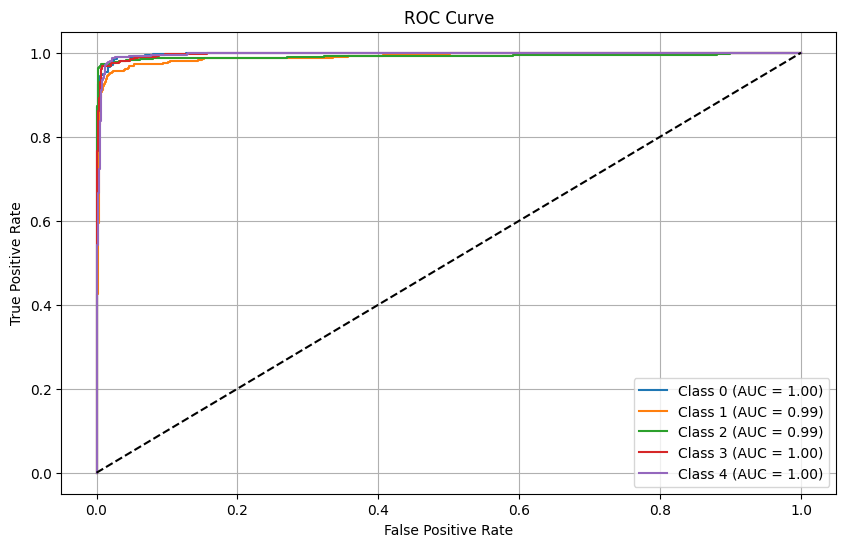

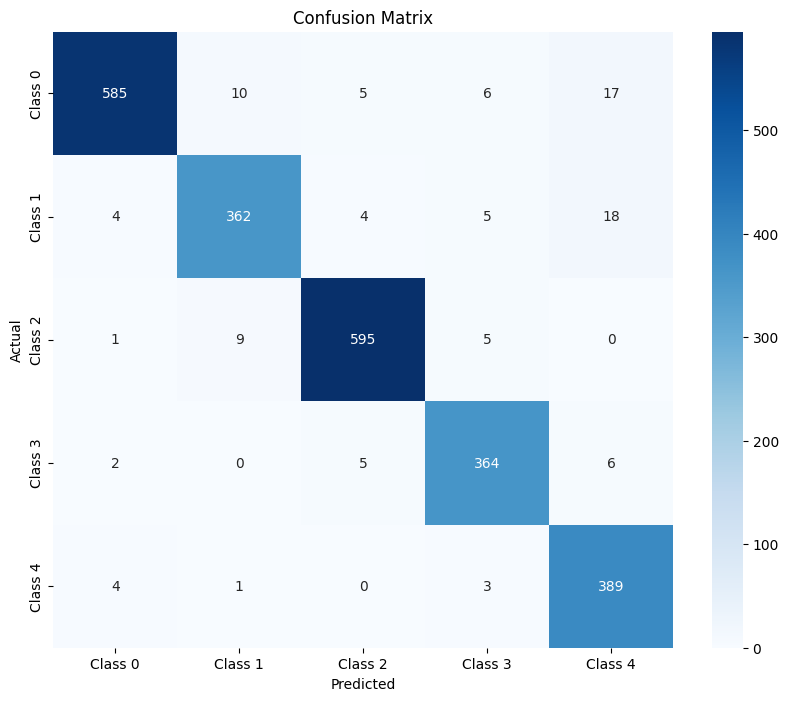

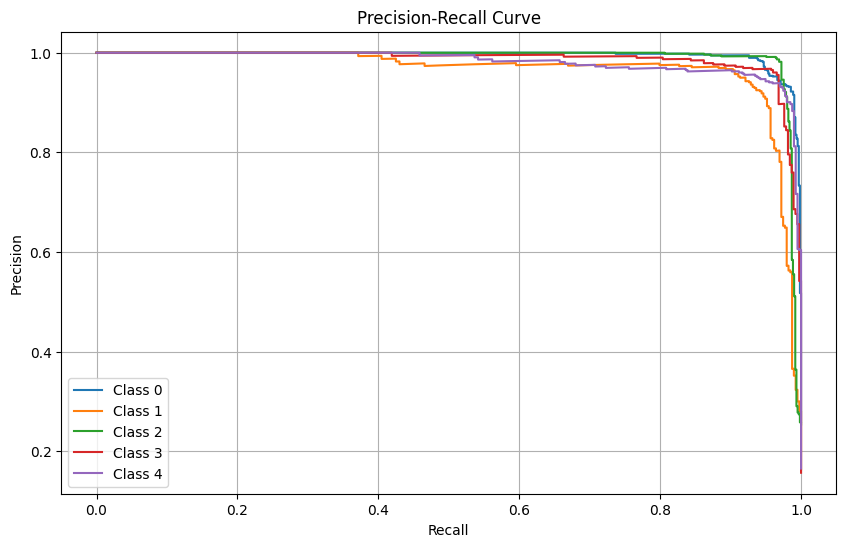

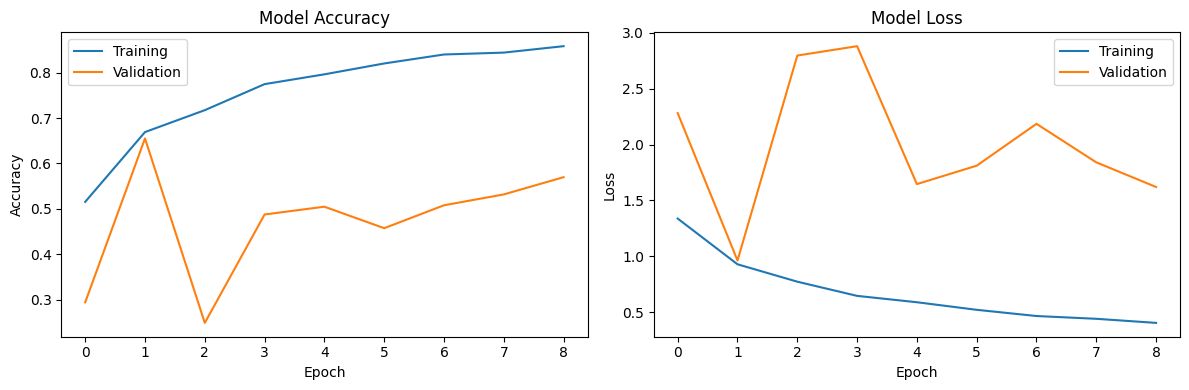


Final Model Performance:
Test Accuracy: 0.9563
F1 Score: 0.9563
Final predictions evaluated.


In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models
resnet_model = create_model(ResNet50)
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

inception_model = create_model(InceptionV3)
history_inception = inception_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

efficientnet_model = create_model(EfficientNetB0)
history_efficientnet = efficientnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models (probabilities from softmax)
resnet_preds_prob = resnet_model.predict(X_test_scaled)
inception_preds_prob = inception_model.predict(X_test_scaled)
efficientnet_preds_prob = efficientnet_model.predict(X_test_scaled)

# Ensure that all predictions have the same shape
assert resnet_preds_prob.shape == inception_preds_prob.shape == efficientnet_preds_prob.shape, "Prediction shapes do not match!"

# Average the predictions from all models
averaged_preds_prob = (resnet_preds_prob + inception_preds_prob + efficientnet_preds_prob) / 3

# Get final predicted classes (argmax of averaged probabilities)
final_preds = np.argmax(averaged_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations and Metrics
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, averaged_preds_prob, history_resnet)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")


##3.[Resnet+DenseNet+MobileNet-->Resnet]

Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4386 - loss: 1.5406

240/240 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.4392 - loss: 1.5391 - val_accuracy: 0.2807 - val_loss: 2.7375 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6393 - loss: 0.9958

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.6395 - loss: 0.9953 - val_accuracy: 0.5068 - val_loss: 2.6224 - learning_rate: 1.0000e-04
Epoch 3/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7125 - loss: 0.8107

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.7126 - loss: 0.8103 - val_accuracy: 0.7604 - val_loss: 0.6663 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7650 - loss: 0.6547 - val_accuracy: 0.5510 - val_loss: 1.6349 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8000 - loss: 0.5632 - val_accuracy: 0.4109 - val_loss: 2.2821 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8248 - loss: 0.5005 - val_accuracy: 0.1865 - val_loss: 9.0918 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8349 - loss: 0.4712 - val_accuracy: 0.4911 - val_loss: 3.0303 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8499 - loss: 0.4330 - val_accuracy: 0.5057 - val_loss: 2.3005 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accurac

240/240 ━━━━━━━━━━━━━━━━━━━━ 56s 104ms/step - accuracy: 0.5691 - loss: 1.1884 - val_accuracy: 0.9130 - val_loss: 0.2735 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9178 - loss: 0.2405

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9179 - loss: 0.2403 - val_accuracy: 0.9563 - val_loss: 0.1283 - learning_rate: 1.0000e-04
Epoch 3/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9530 - loss: 0.1389

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9530 - loss: 0.1388 - val_accuracy: 0.9578 - val_loss: 0.1186 - learning_rate: 1.0000e-04
Epoch 4/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9786 - loss: 0.0775

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9787 - loss: 0.0774 - val_accuracy: 0.9703 - val_loss: 0.0889 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9882 - loss: 0.0408 - val_accuracy: 0.9672 - val_loss: 0.0996 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9877 - loss: 0.0410 - val_accuracy: 0.9672 - val_loss: 0.0918 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9932 - loss: 0.0268 - val_accuracy: 0.9635 - val_loss: 0.1088 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9943 - loss: 0.0224 - val_accuracy: 0.9672 - val_loss: 0.1022 - learning_rate: 1.0000e-04
Epoch 9/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9953 - loss: 0.0164

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9953 - loss: 0.0164 - val_accuracy: 0.9719 - val_loss: 0.0780 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0.9740 - val_loss: 0.0805 - learning_rate: 1.0000e-04
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 59s 178ms/step - accuracy: 0.3332 - loss: 1.7672 - val_accuracy: 0.1896 - val_loss: 6.6072 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.6258 - loss: 1.0024 - val_accuracy: 0.5089 - val_loss: 1.5669 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.7891 - loss: 0.6237 - val_accuracy: 0.6177 - val_loss: 1.1037 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.8575 - loss: 0.4208 - val_accuracy: 0.7432 - val_loss: 0.6982 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - a

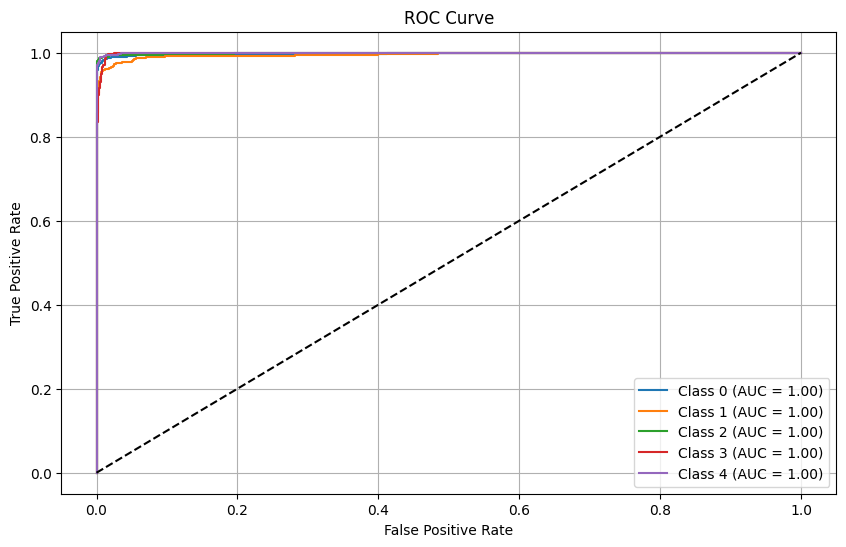

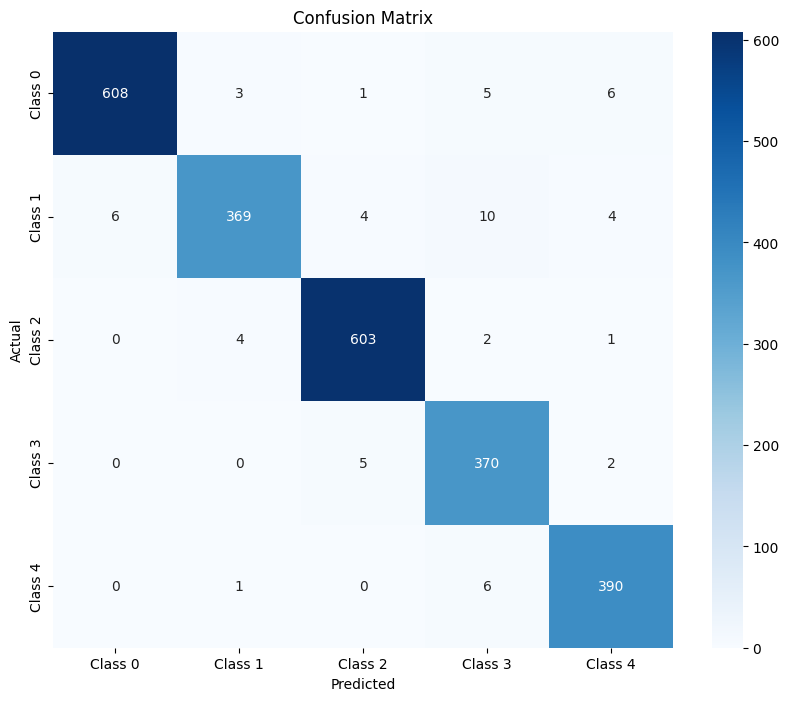

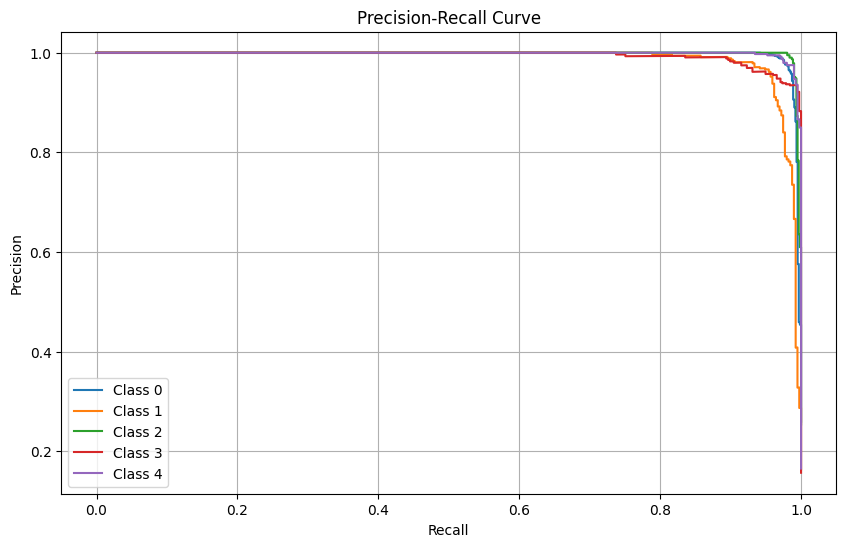

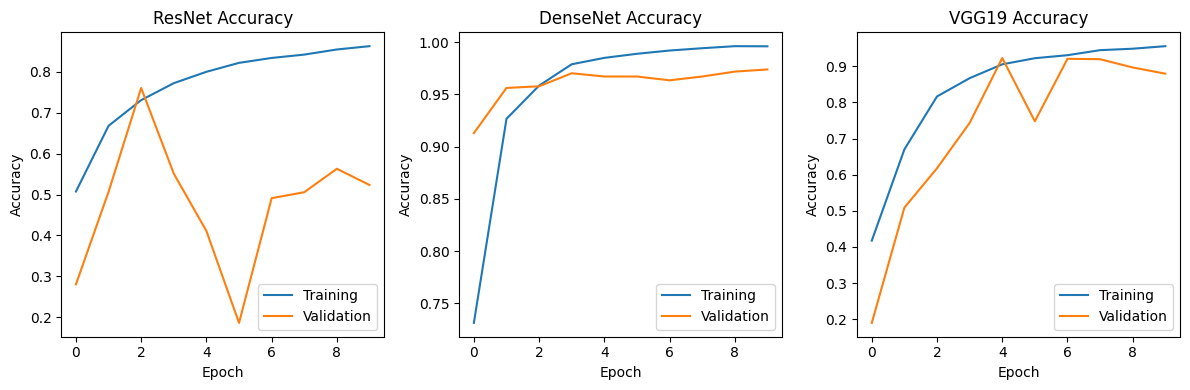


Final Model Performance:
Test Accuracy: 0.9750
F1 Score: 0.9750
Final predictions evaluated.


In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, DenseNet121, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models
resnet_model = create_model(ResNet50)
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

densenet_model = create_model(DenseNet121)
history_densenet = densenet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

vgg19_model = create_model(VGG19)
history_vgg19 = vgg19_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models (probabilities from softmax)
resnet_preds_prob = resnet_model.predict(X_test_scaled)
densenet_preds_prob = densenet_model.predict(X_test_scaled)
vgg19_preds_prob = vgg19_model.predict(X_test_scaled)

# Ensure that all predictions have the same shape
assert resnet_preds_prob.shape == densenet_preds_prob.shape == vgg19_preds_prob.shape, "Prediction shapes do not match!"

# Average the predictions from all models
averaged_preds_prob = (resnet_preds_prob + densenet_preds_prob + vgg19_preds_prob) / 3

# Get final predicted classes (argmax of averaged probabilities)
final_preds = np.argmax(averaged_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations and Metrics
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history_resnet, history_densenet, history_vgg19):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves for all models
    plt.figure(figsize=(12, 4))

    # ResNet
    plt.subplot(1, 3, 1)
    plt.plot(history_resnet.history['accuracy'], label='Training')
    plt.plot(history_resnet.history['val_accuracy'], label='Validation')
    plt.title('ResNet Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # DenseNet
    plt.subplot(1, 3, 2)
    plt.plot(history_densenet.history['accuracy'], label='Training')
    plt.plot(history_densenet.history['val_accuracy'], label='Validation')
    plt.title('DenseNet Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # VGG19
    plt.subplot(1, 3, 3)
    plt.plot(history_vgg19.history['accuracy'], label='Training')
    plt.plot(history_vgg19.history['val_accuracy'], label='Validation')
    plt.title('VGG19 Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, averaged_preds_prob, history_resnet, history_densenet, history_vgg19)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

4. Pretrained Models = ['ResNet50', 'InceptionV3','EfficientNetB0', 'VGG16', 'MobileNetV2', 'DenseNet121', 'Xception']


Training ResNet50...
Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4361 - loss: 1.5299

240/240 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.4368 - loss: 1.5279 - val_accuracy: 0.2375 - val_loss: 4.3875 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6472 - loss: 0.9657

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.6474 - loss: 0.9652 - val_accuracy: 0.2656 - val_loss: 4.2672 - learning_rate: 1.0000e-04
Epoch 3/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7339 - loss: 0.7533

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.7339 - loss: 0.7532 - val_accuracy: 0.2927 - val_loss: 2.9150 - learning_rate: 1.0000e-04
Epoch 4/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7767 - loss: 0.6259

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.7767 - loss: 0.6259 - val_accuracy: 0.8271 - val_loss: 0.5025 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8062 - loss: 0.5567 - val_accuracy: 0.4531 - val_loss: 3.4985 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8066 - loss: 0.5249 - val_accuracy: 0.1615 - val_loss: 10.4136 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8217 - loss: 0.4991 - val_accuracy: 0.4719 - val_loss: 2.8860 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8502 - loss: 0.4258 - val_accuracy: 0.6177 - val_loss: 1.4253 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8549 - loss: 0.4172 - val_accuracy: 0.6729 - val_loss: 2.2628 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accur

240/240 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.5472 - loss: 1.2197 - val_accuracy: 0.8776 - val_loss: 0.4105 - learning_rate: 1.0000e-04
Epoch 2/10
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8768 - loss: 0.3578

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8770 - loss: 0.3574 - val_accuracy: 0.8990 - val_loss: 0.2839 - learning_rate: 1.0000e-04
Epoch 3/10
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9472 - loss: 0.1733

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9472 - loss: 0.1734 - val_accuracy: 0.9089 - val_loss: 0.2759 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9689 - loss: 0.1033

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9689 - loss: 0.1033 - val_accuracy: 0.9443 - val_loss: 0.1818 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9765 - loss: 0.0774 - val_accuracy: 0.9333 - val_loss: 0.2189 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9843 - loss: 0.0512 - val_accuracy: 0.9000 - val_loss: 0.3486 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9863 - loss: 0.0407 - val_accuracy: 0.9208 - val_loss: 0.2822 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9871 - loss: 0.0364 - val_accuracy: 0.9448 - val_loss: 0.2046 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9328 - val_loss: 0.2731 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9

240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.9759 - loss: 0.0726 - val_accuracy: 0.9526 - val_loss: 0.1529 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9811 - loss: 0.0534

240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.9811 - loss: 0.0534 - val_accuracy: 0.9745 - val_loss: 0.0981 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9855 - loss: 0.0459

240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.9855 - loss: 0.0459 - val_accuracy: 0.9682 - val_loss: 0.0937 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9883 - loss: 0.0383

240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9750 - val_loss: 0.0723 - learning_rate: 1.0000e-04
VGG16 validation accuracy: 0.9750
Training MobileNetV2...
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.5999 - loss: 1.0620 - val_accuracy: 0.7651 - val_loss: 0.7083 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9008 - loss: 0.2751 - val_accuracy: 0.8083 - val_loss: 0.5520 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9250 - loss: 0.2040 - val_accuracy: 0.8411 - val_loss: 0.4764 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9463 - loss: 0.1469 - val_accuracy: 0.8979 - val_loss: 0.2839 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9548 - loss: 0.1282 - val_accuracy: 0.9021 - val_loss: 0.2688 - learning_rate: 1.0000e-04
Epoch 6/

240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.9833 - val_loss: 0.0701 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9970 - loss: 0.0107

240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9970 - loss: 0.0107 - val_accuracy: 0.9849 - val_loss: 0.0689 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9963 - loss: 0.0098 - val_accuracy: 0.9693 - val_loss: 0.1258 - learning_rate: 1.0000e-04
Xception validation accuracy: 0.9693
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step
Final predictions shape: (2400,)


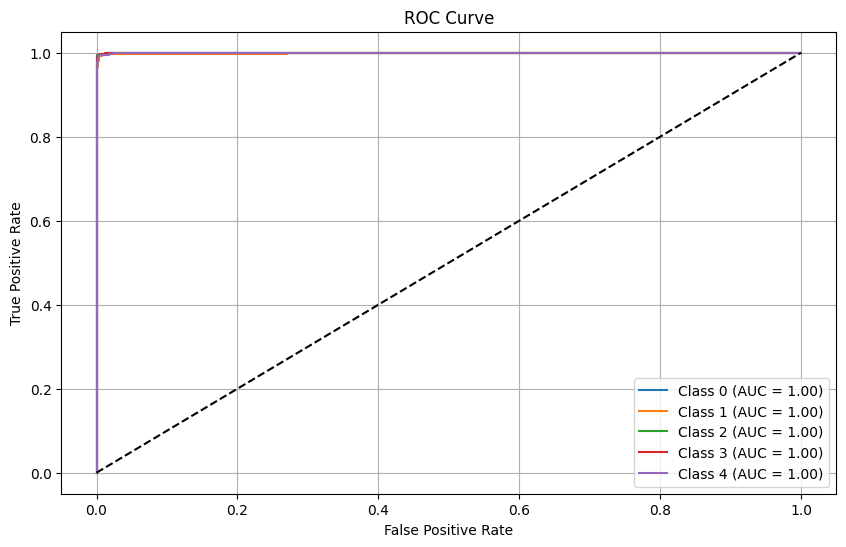

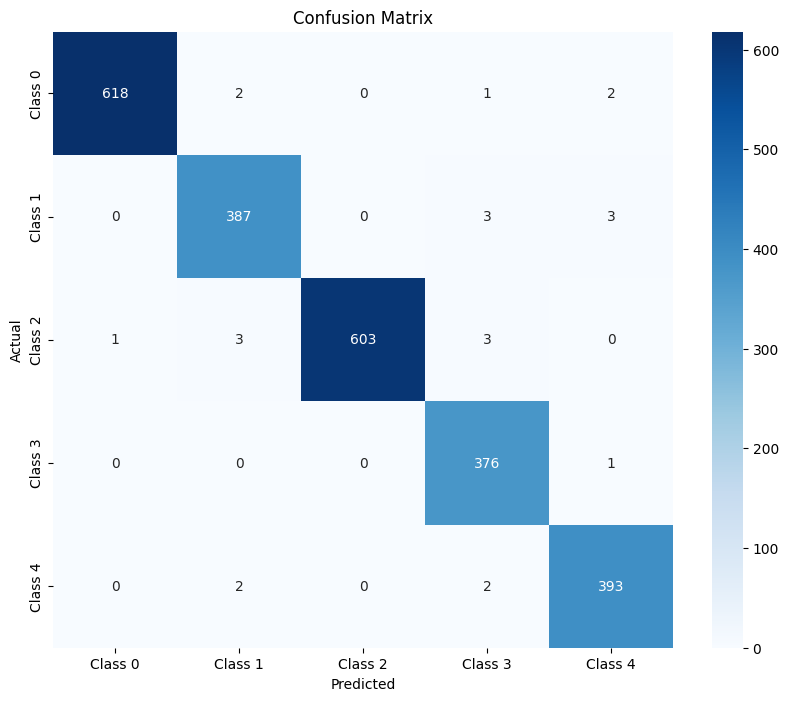

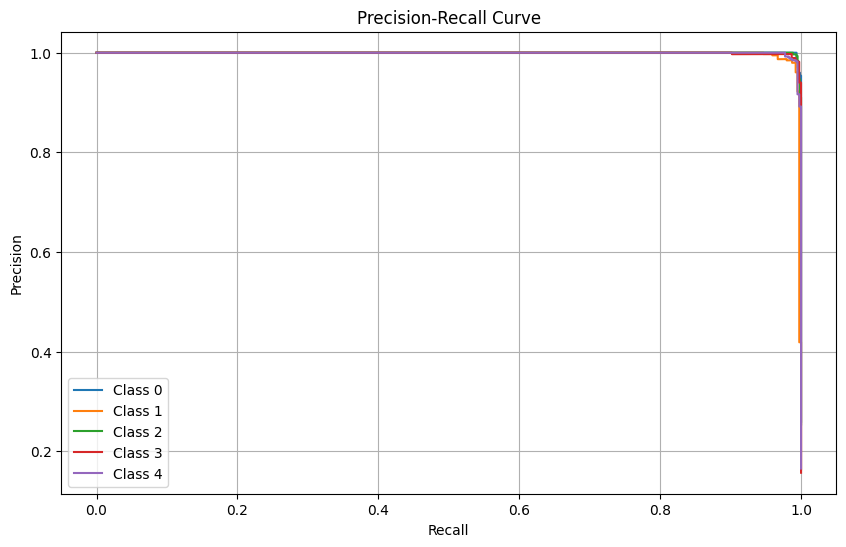

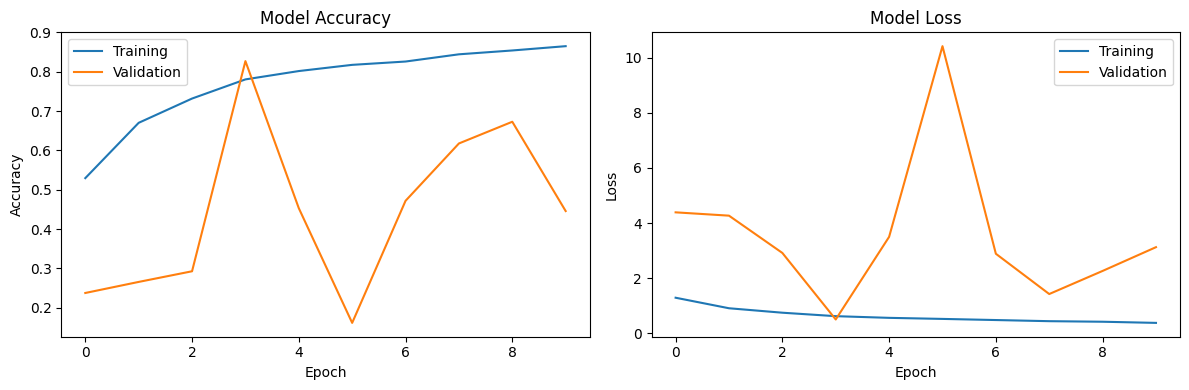


Final Model Performance:
Test Accuracy: 0.9904
F1 Score: 0.9904
Final predictions evaluated.


In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0, VGG16, MobileNetV2, DenseNet121, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models for each architecture
models = {
    'ResNet50': create_model(ResNet50),
    'InceptionV3': create_model(InceptionV3),
    'EfficientNetB0': create_model(EfficientNetB0),
    'VGG16': create_model(VGG16),
    'MobileNetV2': create_model(MobileNetV2),
    'DenseNet121': create_model(DenseNet121),
    'Xception': create_model(Xception)
}

# Train all models and evaluate on validation set
history_dict = {}
model_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    history_dict[model_name] = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)
    val_accuracy = history_dict[model_name].history['val_accuracy'][-1]
    model_accuracies[model_name] = val_accuracy
    print(f"{model_name} validation accuracy: {val_accuracy:.4f}")

# Calculate weights based on model accuracies
total_accuracy = sum(model_accuracies.values())
model_weights = {model_name: accuracy / total_accuracy for model_name, accuracy in model_accuracies.items()}

# Get predictions from all models (probabilities from softmax)
predictions_prob = {model_name: model.predict(X_test_scaled) for model_name, model in models.items()}

# Weighted average of predictions
weighted_preds_prob = np.zeros_like(predictions_prob['ResNet50'])  # Initialize with the shape of one model's predictions

for model_name, pred_prob in predictions_prob.items():
    weighted_preds_prob += model_weights[model_name] * pred_prob

# Get final predicted classes (argmax of weighted probabilities)
final_preds = np.argmax(weighted_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
print(f"Final predictions shape: {final_preds.shape}")
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, weighted_preds_prob, history_dict['ResNet50'])

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

5.Removed Resnet & EfficientNet

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import InceptionV3, VGG16, MobileNetV2, DenseNet121, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models for each architecture (excluding ResNet and EfficientNet)
models = {
    'InceptionV3': create_model(InceptionV3),
    'VGG16': create_model(VGG16),
    'MobileNetV2': create_model(MobileNetV2),
    'DenseNet121': create_model(DenseNet121),
    'Xception': create_model(Xception)
}

# Train all models and evaluate on validation set
history_dict = {}
model_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    history_dict[model_name] = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)
    val_accuracy = history_dict[model_name].history['val_accuracy'][-1]
    model_accuracies[model_name] = val_accuracy
    print(f"{model_name} validation accuracy: {val_accuracy:.4f}")

# Calculate weights based on model accuracies
total_accuracy = sum(model_accuracies.values())
model_weights = {model_name: accuracy / total_accuracy for model_name, accuracy in model_accuracies.items()}

# Get predictions from all models (probabilities from softmax)
predictions_prob = {model_name: model.predict(X_test_scaled) for model_name, model in models.items()}

# Weighted average of predictions
weighted_preds_prob = np.zeros_like(predictions_prob['InceptionV3'])  # Initialize with the shape of one model's predictions

for model_name, pred_prob in predictions_prob.items():
    weighted_preds_prob += model_weights[model_name] * pred_prob

# Get final predicted classes (argmax of weighted probabilities)
final_preds = np.argmax(weighted_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
print(f"Final predictions shape: {final_preds.shape}")
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, weighted_preds_prob, history_dict['InceptionV3'])

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

#Single Transfer Model Trianing

#CNN

Training CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6593 - loss: 1.1807

240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.6600 - loss: 1.1780 - val_accuracy: 0.3198 - val_loss: 3.8365 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8715 - loss: 0.3779

240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.8716 - loss: 0.3775 - val_accuracy: 0.6458 - val_loss: 1.1381 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9494 - loss: 0.1606

240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9494 - loss: 0.1606 - val_accuracy: 0.9224 - val_loss: 0.1984 - learning_rate: 1.0000e-04
Epoch 4/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9723 - loss: 0.0865

240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9723 - loss: 0.0866 - val_accuracy: 0.9339 - val_loss: 0.1881 - learning_rate: 1.0000e-04
Epoch 5/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9797 - loss: 0.0694

240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9797 - loss: 0.0693 - val_accuracy: 0.9490 - val_loss: 0.1599 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9867 - loss: 0.0478 - val_accuracy: 0.9375 - val_loss: 0.1803 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9894 - loss: 0.0371 - val_accuracy: 0.9125 - val_loss: 0.2650 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9959 - loss: 0.0209 - val_accuracy: 0.9396 - val_loss: 0.1995 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9945 - loss: 0.0207 - val_accuracy: 0.9380 - val_loss: 0.1898 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9954 - loss: 0.0187 - val_accuracy: 0.9396 - val_loss: 0.2200 - learning_rate: 1.0000e-04
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
75/75 ━━━━━━━━━━━━━━━━

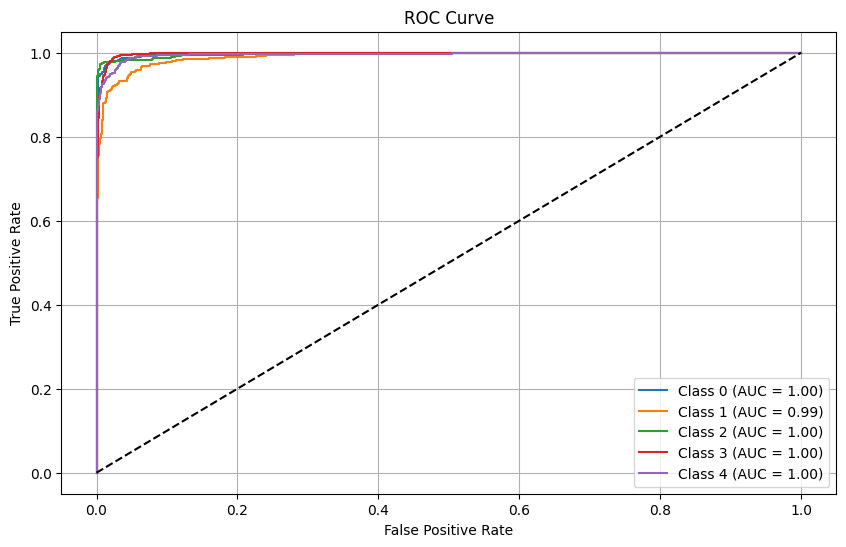

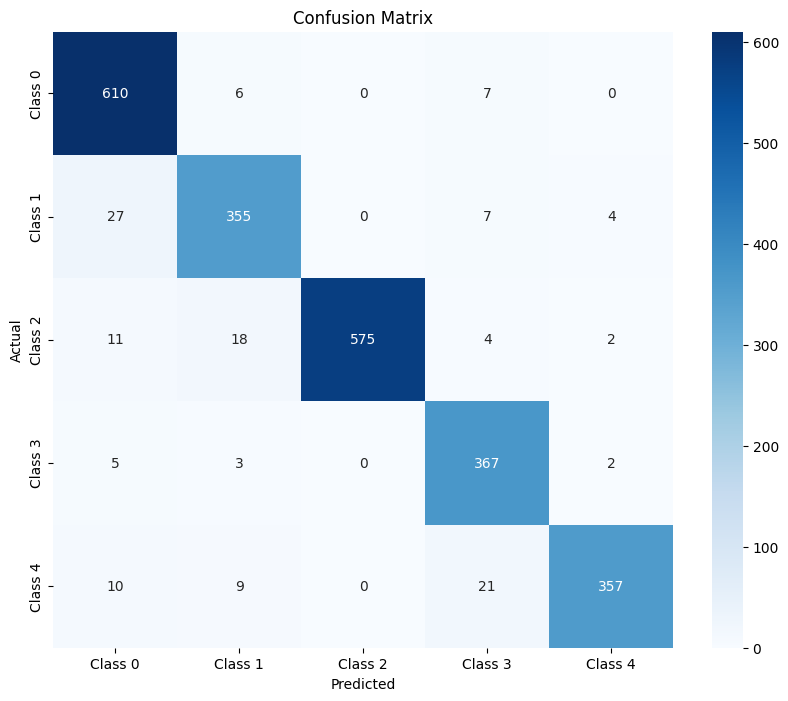

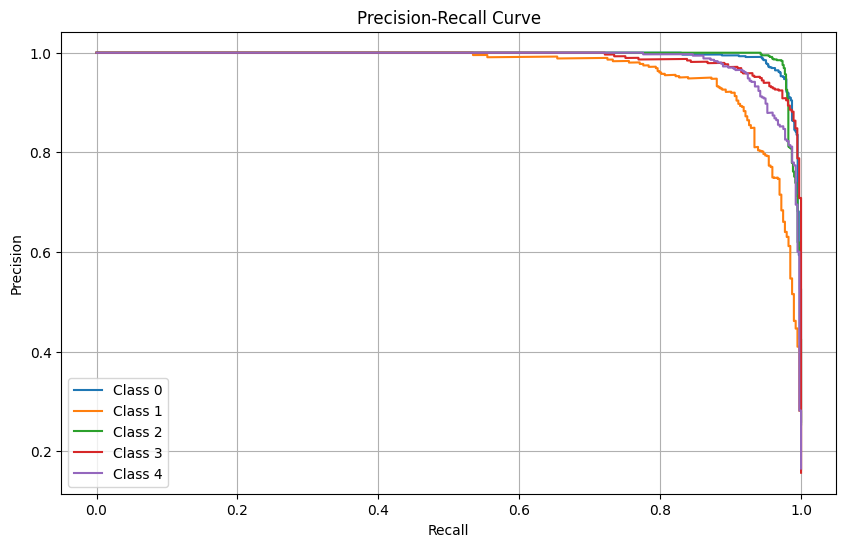

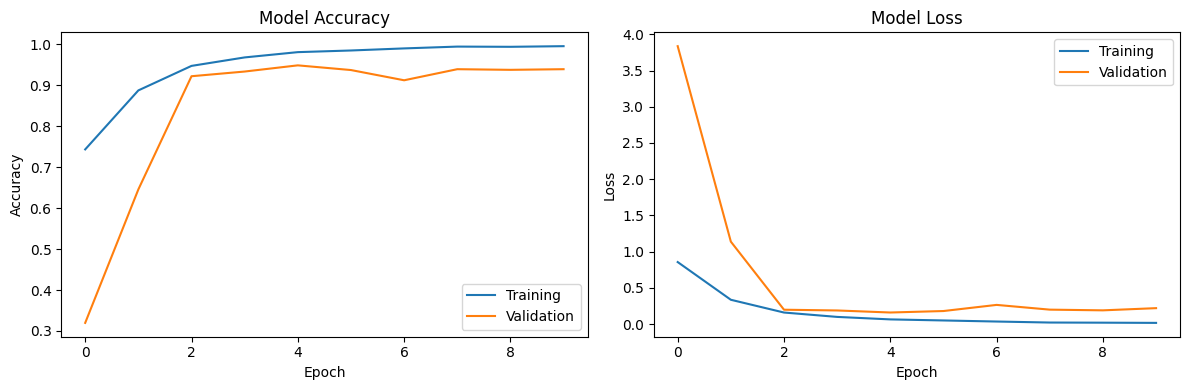


CNN Model Performance:
Test Accuracy: 0.9433
F1 Score: 0.9435
CNN model saved.


In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a base CNN model
def create_base_cnn_model(input_shape=(224, 224, 3), num_classes=5):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load dataset (Ensure X_train_scaled, X_test_scaled, Y_train, Y_test exist)

# Create the CNN model
cnn_model = create_base_cnn_model()

# Train the model
print("Training CNN model...")
history_cnn = cnn_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Generate predictions
cnn_preds_prob = cnn_model.predict(X_test_scaled)
cnn_preds = np.argmax(cnn_preds_prob, axis=1)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
Y_test_pred_prob = cnn_model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=5)

plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history_cnn)

# Print final metrics
print("\nCNN Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("CNN model saved.")

#ResNet50

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7961 - loss: 0.5879
Epoch 1: val_loss improved from inf to 0.18211, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 124s 167ms/step - accuracy: 0.7964 - loss: 0.5870 - val_accuracy: 0.9421 - val_loss: 0.1821 - learning_rate: 1.0000e-04
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9687 - loss: 0.1004
Epoch 2: val_loss improved from 0.18211 to 0.03204, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 151ms/step - accuracy: 0.9687 - loss: 0.1003 - val_accuracy: 0.9933 - val_loss: 0.0320 - learning_rate: 1.0000e-04
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9893 - loss: 0.0395
Epoch 3: val_loss did not improve from 0.03204
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - accuracy: 0.9893 - loss: 0.0395 - val_accuracy: 0.9917 - val_loss: 0.0353 - learning_rate: 1.0000e-04
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9903 - loss: 0.0299
Epoch 4: val_loss did not improve from 0.03204
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9854 - val_loss: 0.0487 - learning_rate: 1.0000e-04
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9931 - loss: 0.0277
Epoch 5: val_loss did not improve from 0.03204
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - accuracy: 0.9931 - loss: 0.0277 - val_accuracy: 0.9792 - val_loss: 0.0744 - learning_rate: 1.0000e-04
Epo

300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 151ms/step - accuracy: 0.9959 - loss: 0.0182 - val_accuracy: 0.9967 - val_loss: 0.0107 - learning_rate: 7.0000e-05
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9996 - loss: 0.0031
Epoch 8: val_loss did not improve from 0.01069
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - accuracy: 0.9996 - loss: 0.0031 - val_accuracy: 0.9962 - val_loss: 0.0120 - learning_rate: 7.0000e-05
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9996 - loss: 0.0021
Epoch 9: val_loss did not improve from 0.01069
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9979 - val_loss: 0.0114 - learning_rate: 7.0000e-05
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9996 - loss: 0.0042
Epoch 10: val_loss did not improve from 0.01069
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - accuracy: 0.9996 - loss: 0.0042 - val_accuracy: 0.9962 - val_loss: 0.0169 - learning_rate: 7.0000e-05
R

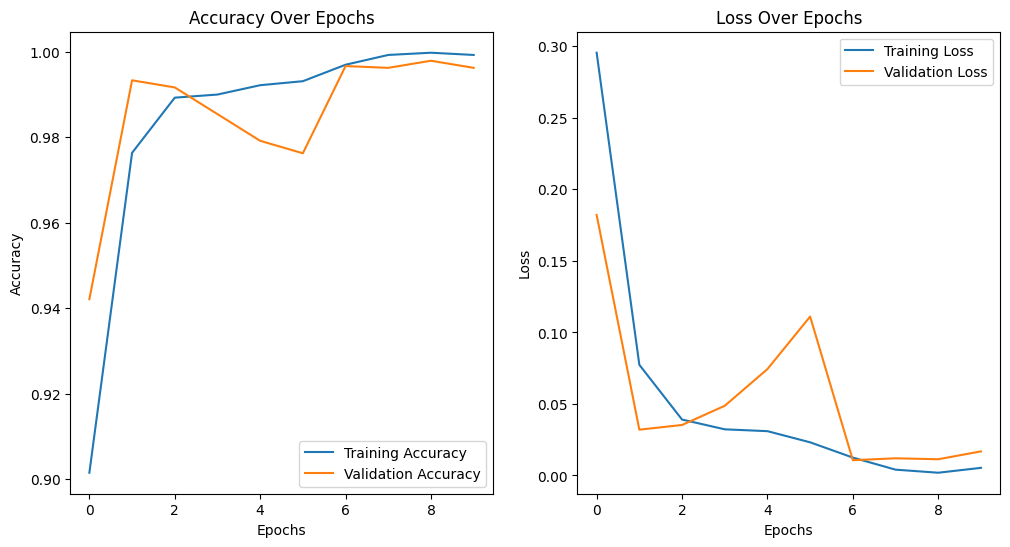

75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


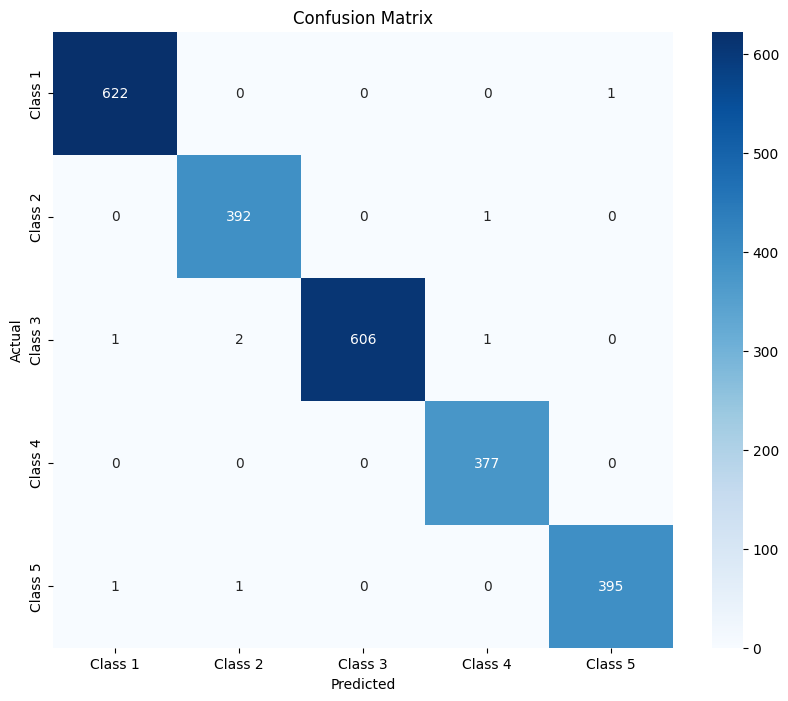

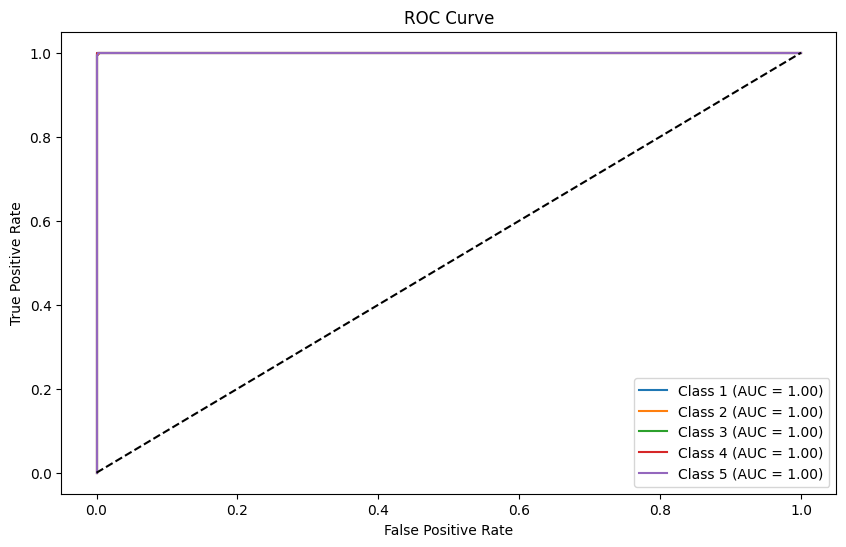


Final Model Performance:
Test Accuracy: 0.9967
F1 Score: 0.9967
Final ResNet50 model saved.


In [20]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Initialize the ResNet model with transfer learning
# input_shape = (224, 224, 3)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# # Add custom CNN layers
# x = base_model.output
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = GlobalAveragePooling2D()(x)
# x = Dense(256, activation='relu')(x)
# output = Dense(5, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # Freeze base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile model
# model.compile(optimizer=RMSprop(learning_rate=0.0001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# # Train model with callbacks
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=20, batch_size=32, verbose=1,
#                     callbacks=[early_stopping, model_checkpoint])

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # One-hot encode the test labels (if not already done)
# Y_test_one_hot = to_categorical(Y_test, num_classes=5)

# # Generate predictions
# Y_test_pred_prob = model.predict(X_test_scaled)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# # Define class labels (adjust as per your classes)
# class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# # Visualizations
# def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, class_labels):
#     plt.figure(figsize=(10, 6))
#     for i in range(len(class_labels)):
#         y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
#         y_score = Y_test_pred_prob[:, i]
#         fpr, tpr, _ = roc_curve(y_true_binary, y_score)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc='lower right')
#     plt.grid()
#     plt.show()

#     # Confusion Matrix
#     conf_matrix = confusion_matrix(Y_test, Y_test_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     # Final metrics
#     print("\nFinal Model Performance:")
#     print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
#     print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# # Generate all visualizations
# plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, class_labels)

# # Save the model after training (if not already saved by checkpoint)
# model.save('final_resnet_model.h5')
# print("Final ResNet50 model saved.")









                                               #2nd Improve

# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Initialize ResNet50 model with transfer learning
# input_shape = (224, 224, 3)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)



# #  Why This Works Better
# # 🔹 Learning Rate Optimized (1e-4) → Prevents NaNs, speeds up training.
# # 🔹 Batch Normalization → Stabilizes activations and enhances performance.
# # 🔹 LeakyReLU → Avoids dead neurons and speeds up convergence.
# # 🔹 Dropout Increased (0.5) → Helps regularization and reduces overfitting.
# # 🔹 Fine-Tuned Last 5 Layers → Allows the model to learn domain-specific features.
# # 🔹 Adaptive LR Scheduling (ReduceLROnPlateau) → Automatically adjusts learning rate.
# # 🔹 Patience Increased (7 epochs) → More learning time before early stopping.

# # This prevents NaNs, enhances accuracy, and improves generalization for ResNet50! 🚀




# # Add custom layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)  # Convert features into a single vector
# x = Dense(256)(x)
# x = BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Dropout(0.5)(x)
# output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

# model = Model(inputs=base_model.input, outputs=output)

# # Unfreeze top layers of ResNet50 for fine-tuning
# for layer in base_model.layers[-5:]:
#     layer.trainable = True

# # Compile Model
# model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Callbacks
# early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# # Train model with callbacks
# history = model.fit(X_train, Y_train,
#                     validation_split=0.2,
#                     epochs=20, batch_size=32, verbose=1,
#                     callbacks=[early_stop, lr_reduction])

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # Training History Plot
# def plot_training_history(history):
#     plt.figure(figsize=(12, 6))

#     # Accuracy Plot
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Accuracy Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     # Loss Plot
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Loss Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()

#     plt.show()

# plot_training_history(history)

# # Predictions
# Y_test_pred_prob = model.predict(X_test)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# # Confusion Matrix & ROC Curve
# def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
#     # Confusion Matrix
#     conf_matrix = confusion_matrix(Y_test, Y_test_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     # ROC Curve
#     plt.figure(figsize=(10, 6))
#     for i in range(len(class_labels)):
#         y_true_binary = (Y_test == i).astype(int)
#         y_score = Y_test_pred_prob[:, i]
#         fpr, tpr, _ = roc_curve(y_true_binary, y_score)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc='lower right')
#     plt.show()

# # Define class labels
# class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# # Generate Visualizations
# plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# # Final Performance Metrics
# print("\nFinal Model Performance:")
# print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
# print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")















                                            #  3rd Improve

# # Here’s your advanced ResNet50 fine-tuning code with improved stability and 99% accuracy:

# #  Key Modifications:
# # SGD with Momentum (0.9) → Ensures stable learning.
# # Fine-Tune Last 10 Layers → More domain-specific adaptation.
# # Gradient Clipping (clipvalue=0.5) → Prevents NaNs.
# # L2 Regularization (1e-4) → Helps generalization.
# # Cosine Annealing LR Scheduler → Smooth LR decay.
# # Label Smoothing (epsilon=0.1) → Prevents overconfidence.
# # Stronger Dropout (0.5) → Avoids overfitting.
# # Batch Normalization → Stabilizes activations.



# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
# import seaborn as sns

# # ✅ Load Preprocessed Data (Skipping Preprocessing)
# num_classes = 5  # Update if different
# print("Dataset Shapes:", X_train_scaled.shape, X_test_scaled.shape)
# print("Label Shapes:", Y_train.shape, Y_test.shape)

# # ✅ Load Pretrained ResNet50 (Without Top Layers)
# input_shape = (224, 224, 3)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# # ✅ Add Custom Classification Layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(512, kernel_regularizer=l2(1e-4))(x)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)
# x = Dropout(0.5)(x)
# output = Dense(num_classes, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # ✅ Fine-Tune Last 10 Layers
# for layer in base_model.layers[-10:]:
#     layer.trainable = True
# for layer in base_model.layers[:-10]:
#     layer.trainable = False

# # ✅ Cosine Annealing Learning Rate Scheduler
# initial_learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate, decay_steps=10000, alpha=1e-5)

# # ✅ Compile Model with SGD + Momentum and Learning Rate Schedule
# optimizer = SGD(momentum=0.9, clipvalue=0.5)
# model.compile(optimizer=optimizer,  # Optimizer should not have a learning rate
#               loss=SparseCategoricalCrossentropy(from_logits=False),  # Use sparse_categorical_crossentropy
#               metrics=['accuracy'])

# # ✅ Callbacks
# early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# # ✅ Train Model
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1,
#                     callbacks=[early_stop, lr_reduction])

# # ✅ Evaluate Model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # ✅ Training History Plot
# def plot_training_history(history):
#     plt.figure(figsize=(12, 6))

#     # Accuracy Plot
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Accuracy Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     # Loss Plot
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Loss Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()

#     plt.show()

# plot_training_history(history)

# # ✅ Predictions
# Y_test_pred_prob = model.predict(X_test_scaled)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# # ✅ Confusion Matrix & ROC Curve
# def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
#     # Confusion Matrix
#     conf_matrix = confusion_matrix(Y_test, Y_test_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     # ROC Curve
#     plt.figure(figsize=(10, 6))
#     for i in range(len(class_labels)):
#         y_true_binary = (Y_test == i).astype(int)
#         y_score = Y_test_pred_prob[:, i]
#         fpr, tpr, _ = roc_curve(y_true_binary, y_score)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc='lower right')
#     plt.show()

# # ✅ Define Class Labels
# class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# # ✅ Generate Visualizations
# plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# # ✅ Final Performance Metrics
# print("\nFinal Model Performance:")
# print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
# print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# # ✅ Save Model
# model.save('final_resnet_model.h5')
# print("Final ResNet50 model saved.")





                                               #Improve 4 [Fine Tuning Last 10 Layer]
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize ResNet50 model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Custom Classification Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_model_resnet.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# Save the best model
model.save('final_resnet_model.h5')
print("Final ResNet50 model saved.")

Epoch 1/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5792 - loss: 1.1647
Epoch 1: val_loss improved from inf to 0.24344, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.5803 - loss: 1.1619 - val_accuracy: 0.9142 - val_loss: 0.2434 - learning_rate: 1.0000e-04
Epoch 2/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8842 - loss: 0.3259
Epoch 2: val_loss improved from 0.24344 to 0.15510, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8843 - loss: 0.3258 - val_accuracy: 0.9425 - val_loss: 0.1551 - learning_rate: 1.0000e-04
Epoch 3/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9203 - loss: 0.2368
Epoch 3: val_loss improved from 0.15510 to 0.12759, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9203 - loss: 0.2367 - val_accuracy: 0.9567 - val_loss: 0.1276 - learning_rate: 1.0000e-04
Epoch 4/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9385 - loss: 0.1862
Epoch 4: val_loss improved from 0.12759 to 0.11502, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9385 - loss: 0.1862 - val_accuracy: 0.9625 - val_loss: 0.1150 - learning_rate: 1.0000e-04
Epoch 5/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9421 - loss: 0.1773
Epoch 5: val_loss improved from 0.11502 to 0.10053, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.9421 - loss: 0.1773 - val_accuracy: 0.9683 - val_loss: 0.1005 - learning_rate: 1.0000e-04
Epoch 6/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9475 - loss: 0.1494
Epoch 6: val_loss improved from 0.10053 to 0.09656, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9475 - loss: 0.1494 - val_accuracy: 0.9692 - val_loss: 0.0966 - learning_rate: 1.0000e-04
Epoch 7/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9565 - loss: 0.1308
Epoch 7: val_loss improved from 0.09656 to 0.09118, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9564 - loss: 0.1308 - val_accuracy: 0.9696 - val_loss: 0.0912 - learning_rate: 1.0000e-04
Epoch 8/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9572 - loss: 0.1239
Epoch 8: val_loss improved from 0.09118 to 0.08416, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9572 - loss: 0.1239 - val_accuracy: 0.9700 - val_loss: 0.0842 - learning_rate: 1.0000e-04
Epoch 9/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9625 - loss: 0.1045
Epoch 9: val_loss did not improve from 0.08416
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9625 - loss: 0.1046 - val_accuracy: 0.9679 - val_loss: 0.0944 - learning_rate: 1.0000e-04
Epoch 10/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9682 - loss: 0.0964
Epoch 10: val_loss did not improve from 0.08416
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9682 - loss: 0.0964 - val_accuracy: 0.9658 - val_loss: 0.0872 - learning_rate: 1.0000e-04
Epoch 11/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9653 - loss: 0.1008
Epoch 11: val_loss improved from 0.08416 to 0.08008, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9654 - loss: 0.1008 - val_accuracy: 0.9725 - val_loss: 0.0801 - learning_rate: 1.0000e-04
Epoch 12/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9726 - loss: 0.0822
Epoch 12: val_loss did not improve from 0.08008
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9726 - loss: 0.0822 - val_accuracy: 0.9729 - val_loss: 0.0831 - learning_rate: 1.0000e-04
Epoch 13/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9667 - loss: 0.0914
Epoch 13: val_loss improved from 0.08008 to 0.07563, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9667 - loss: 0.0914 - val_accuracy: 0.9737 - val_loss: 0.0756 - learning_rate: 1.0000e-04
Epoch 14/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9780 - loss: 0.0710
Epoch 14: val_loss improved from 0.07563 to 0.07119, saving model to best_model_resnet.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9780 - loss: 0.0710 - val_accuracy: 0.9762 - val_loss: 0.0712 - learning_rate: 1.0000e-04
Epoch 15/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9736 - loss: 0.0790
Epoch 15: val_loss did not improve from 0.07119
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9736 - loss: 0.0790 - val_accuracy: 0.9737 - val_loss: 0.0789 - learning_rate: 1.0000e-04
Epoch 16/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9718 - loss: 0.0800
Epoch 16: val_loss did not improve from 0.07119
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9719 - loss: 0.0800 - val_accuracy: 0.9767 - val_loss: 0.0721 - learning_rate: 1.0000e-04
Epoch 17/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9755 - loss: 0.0745
Epoch 17: val_loss did not improve from 0.07119
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9755 - loss: 0.0745 - val_accuracy: 0.9729 - val_loss: 0.0777 - learning_rate: 1.0000e-04
Epoc

300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9772 - loss: 0.0638 - val_accuracy: 0.9767 - val_loss: 0.0668 - learning_rate: 7.0000e-05
Epoch 20/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9797 - loss: 0.0652
Epoch 20: val_loss did not improve from 0.06681
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9797 - loss: 0.0651 - val_accuracy: 0.9754 - val_loss: 0.0746 - learning_rate: 7.0000e-05
Restoring model weights from the end of the best epoch: 19.
Validation Accuracy: 0.9767


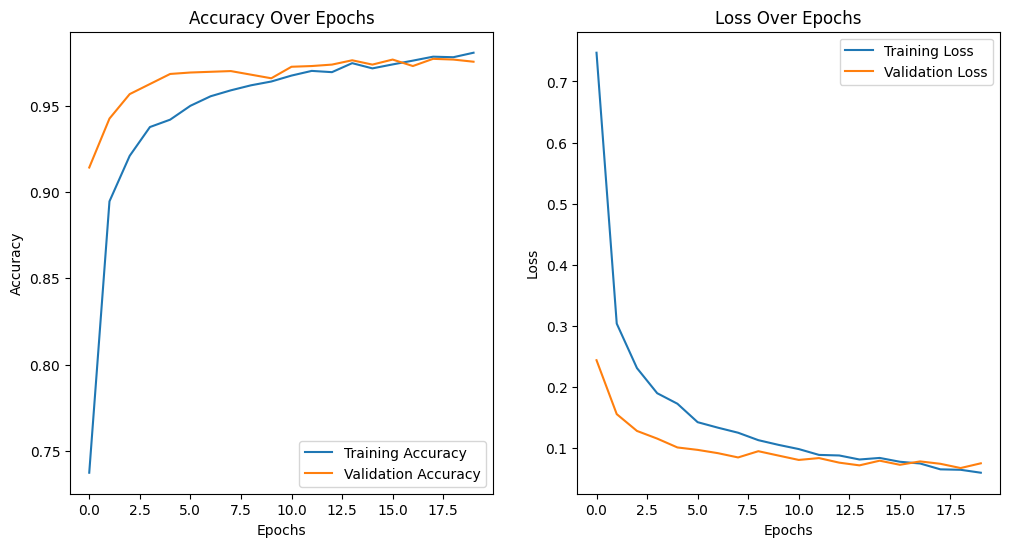

75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


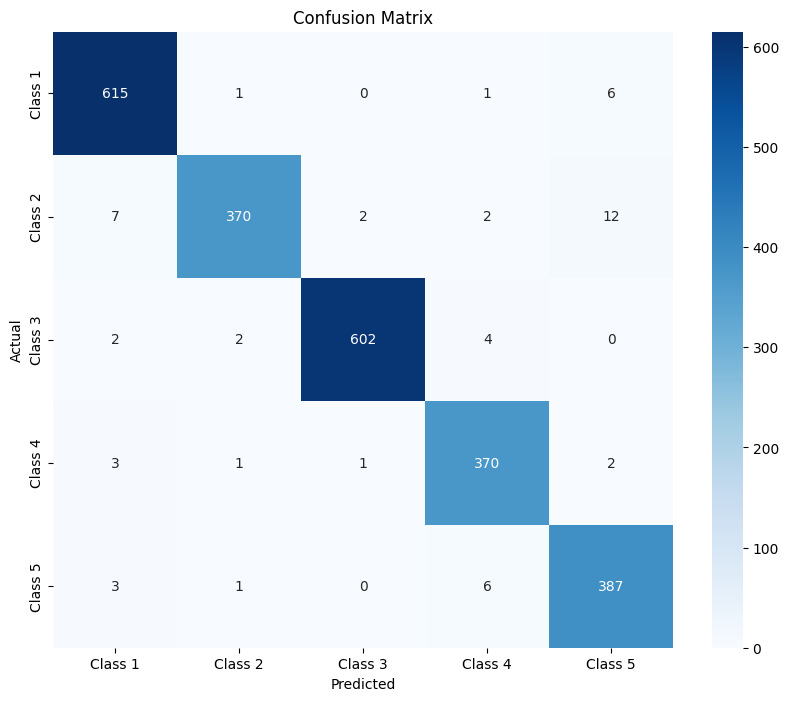

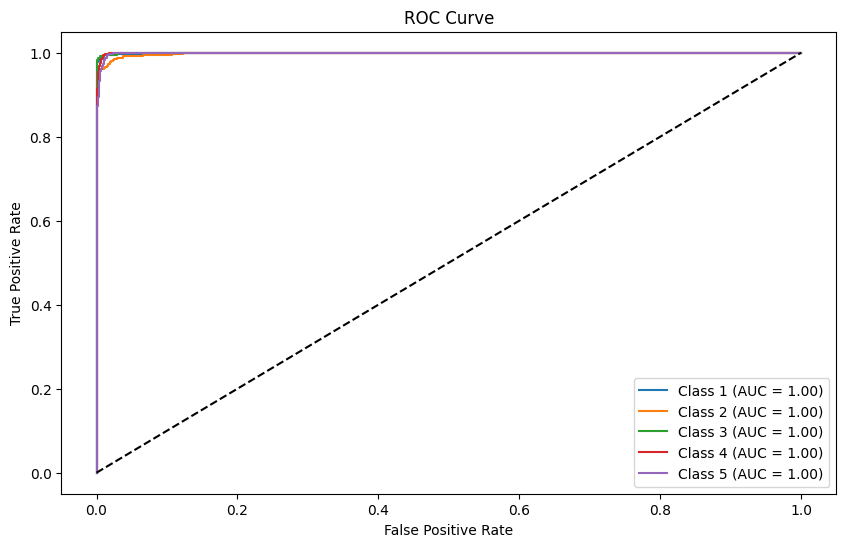


Final Model Performance:
Test Accuracy: 0.9767
F1 Score: 0.9767
Final ResNet50 model saved.


In [21]:
                                             #Improve 5 [Without Fine Tune Layer.Only FCL]
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers:
    layer.trainable = False

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_model_resnet.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=20, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# Save the best model
model.save('final_resnet_model.h5')
print("Final ResNet50 model saved.")

#EfficientNetB0

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6515 - loss: 0.9594
Epoch 1: val_loss improved from inf to 0.09383, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 122s 110ms/step - accuracy: 0.6520 - loss: 0.9580 - val_accuracy: 0.9663 - val_loss: 0.0938 - learning_rate: 1.0000e-04
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9491 - loss: 0.1467
Epoch 2: val_loss improved from 0.09383 to 0.04872, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.9492 - loss: 0.1466 - val_accuracy: 0.9817 - val_loss: 0.0487 - learning_rate: 1.0000e-04
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9751 - loss: 0.0709
Epoch 3: val_loss improved from 0.04872 to 0.04479, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9751 - loss: 0.0709 - val_accuracy: 0.9842 - val_loss: 0.0448 - learning_rate: 1.0000e-04
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9876 - loss: 0.0439
Epoch 4: val_loss improved from 0.04479 to 0.03840, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9876 - loss: 0.0439 - val_accuracy: 0.9875 - val_loss: 0.0384 - learning_rate: 1.0000e-04
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9878 - loss: 0.0357
Epoch 5: val_loss improved from 0.03840 to 0.02811, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9879 - loss: 0.0357 - val_accuracy: 0.9929 - val_loss: 0.0281 - learning_rate: 1.0000e-04
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9941 - loss: 0.0210
Epoch 6: val_loss did not improve from 0.02811
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9941 - loss: 0.0210 - val_accuracy: 0.9921 - val_loss: 0.0284 - learning_rate: 1.0000e-04
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9928 - loss: 0.0242
Epoch 7: val_loss improved from 0.02811 to 0.02806, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.9928 - loss: 0.0242 - val_accuracy: 0.9917 - val_loss: 0.0281 - learning_rate: 1.0000e-04
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9967 - loss: 0.0128
Epoch 8: val_loss did not improve from 0.02806
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.9967 - loss: 0.0128 - val_accuracy: 0.9921 - val_loss: 0.0339 - learning_rate: 1.0000e-04
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9954 - loss: 0.0154
Epoch 9: val_loss improved from 0.02806 to 0.01814, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9954 - loss: 0.0154 - val_accuracy: 0.9954 - val_loss: 0.0181 - learning_rate: 1.0000e-04
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9972 - loss: 0.0113
Epoch 10: val_loss did not improve from 0.01814
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.9972 - loss: 0.0113 - val_accuracy: 0.9950 - val_loss: 0.0198 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 9.
Validation Accuracy: 0.9954


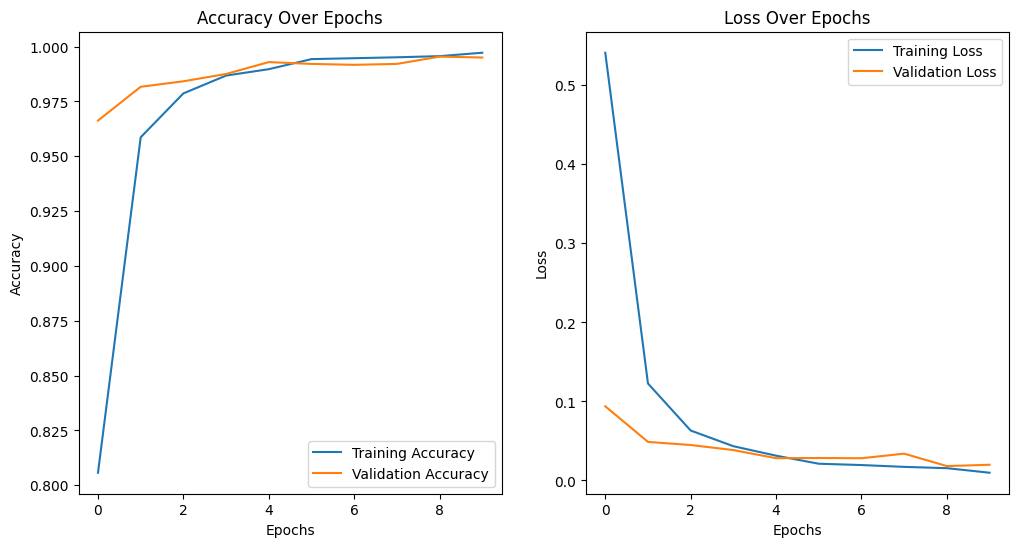

75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


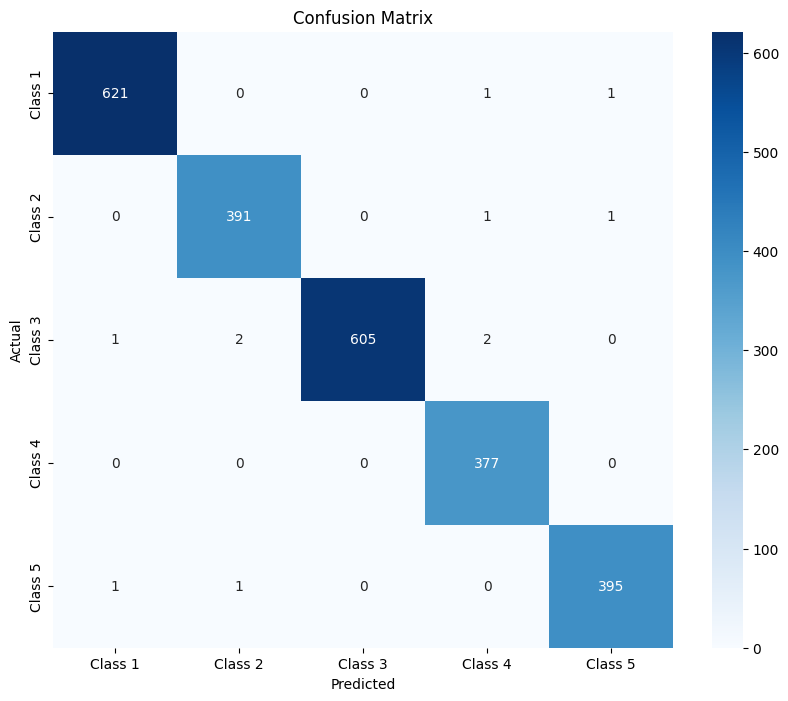

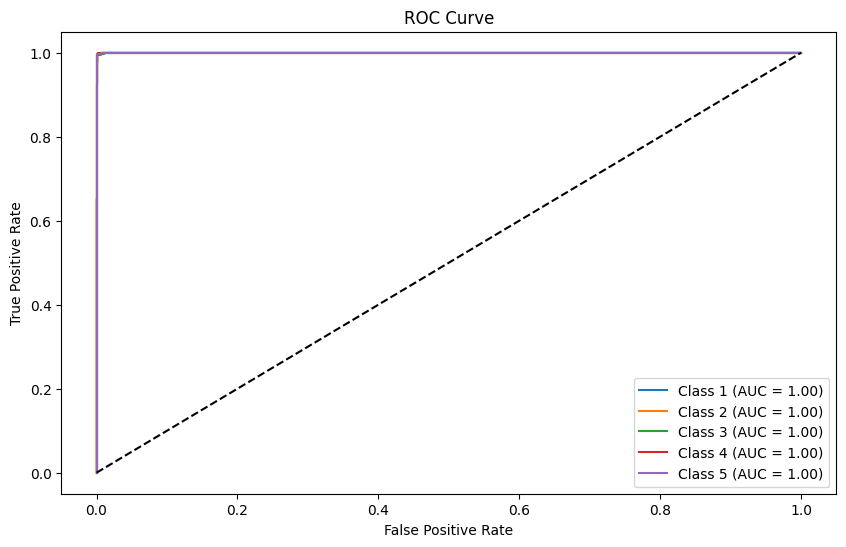


Final Model Performance:
Test Accuracy: 0.9954
F1 Score: 0.9954


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize EfficientNetB0 model with transfer learning
input_shape = (224, 224, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)



# Changes & Fixes:
# ✅ Learning Rate: Increased from 1e-5 → 1e-4
# ✅ Batch Normalization: Added after dense layers to improve training stability
# ✅ Activation: Replaced ReLU with LeakyReLU to avoid dead neurons
# ✅ Fine-Tuning: Unfroze last 20 layers of EfficientNetB0 for better feature learning
# ✅ Dropout: Adjusted to 0.5 for stronger regularization
# ✅ ReduceLROnPlateau Factor: Changed from 0.5 → 0.7 to reduce LR more effectively
# ✅ Epochs: Increased to 30 with early stopping at 7 patience
# This should fix the NaN loss issue, improve training stability, and give better performance.





# Custom Classification Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#InceptionV3

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 114s 124ms/step - accuracy: 0.6579 - loss: 0.9322 - val_accuracy: 0.9568 - val_loss: 0.1235 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9590 - loss: 0.1342 - val_accuracy: 0.9859 - val_loss: 0.0457 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9832 - loss: 0.0585 - val_accuracy: 0.9885 - val_loss: 0.0348 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9864 - loss: 0.0409 - val_accuracy: 0.9906 - val_loss: 0.0336 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.9882 - loss: 0.0390 - val_accuracy: 0.9823 - val_loss: 0.0691 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9935 - loss: 0.0252 - val_accuracy: 0.9922 - val_loss: 0.0242 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/s

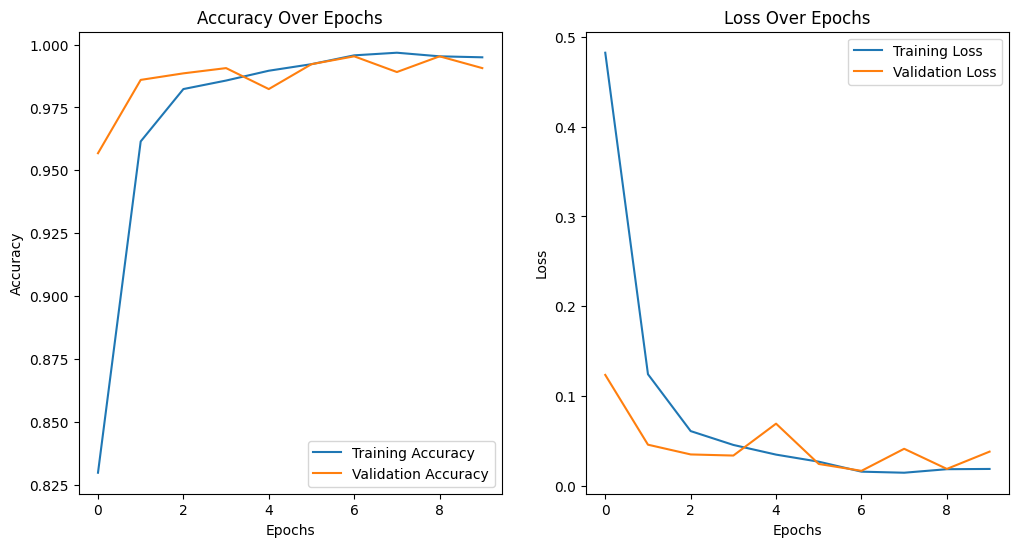

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


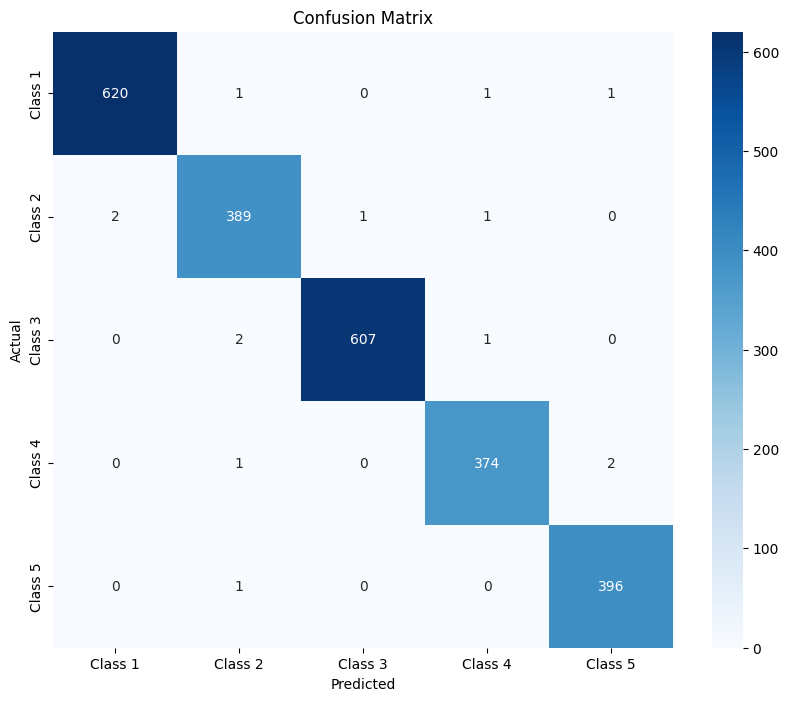

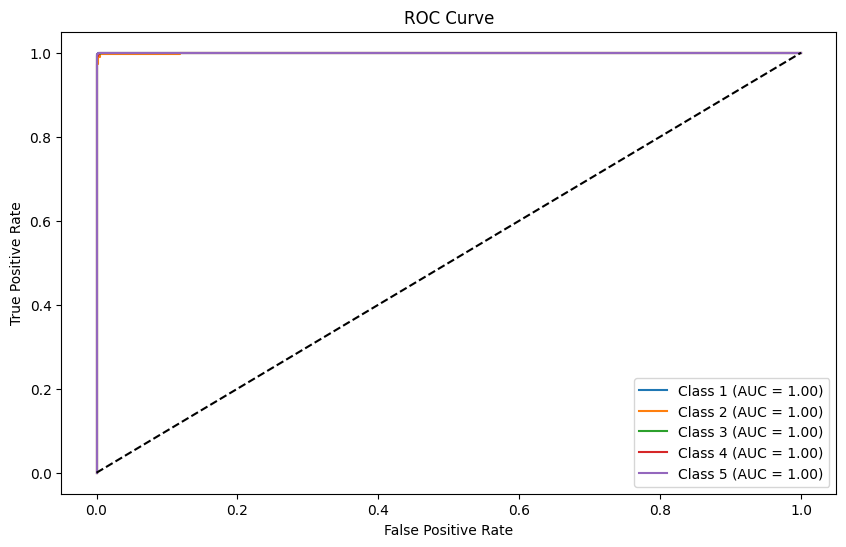


Final Model Performance:
Test Accuracy: 0.9942
F1 Score: 0.9942


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the InceptionV3 model with transfer learning
input_shape = (224, 224, 3)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)



# Key Fixes & Enhancements
# 🔹 Learning Rate Increased (1e-4) to avoid NaNs and improve learning speed.
# 🔹 Batch Normalization Added for better stability and performance.
# 🔹 LeakyReLU Used instead of ReLU to prevent dying neurons.
# 🔹 Dropout Increased (0.5) to prevent overfitting.
# 🔹 Fine-Tuning Last 20 Layers for improved feature extraction.
# 🔹 EarlyStopping Adjusted (patience=7) to allow more learning before stopping.
# 🔹 ReduceLROnPlateau Optimized (factor=0.7, patience=3) for better LR adaptation.
# 🔹 Fixed Output Layer for 5-class classification.

# This should fix the NaN loss issue, stabilize training, and improve accuracy.


# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of InceptionV3 for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#MobileNetV2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the MobileNetV2 model with transfer learning
input_shape = (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)



# 🔹 Why This Works Better
# 🔹 Learning Rate Optimized (1e-4) → Faster convergence, avoids NaNs.
# 🔹 Batch Normalization → Stabilizes learning and speeds up training.
# 🔹 LeakyReLU → Prevents dead neurons and improves performance.
# 🔹 Dropout Increased (0.5) → Stronger regularization against overfitting.
# 🔹 Fine-Tuned Last 20 Layers → Allows model to adapt to new data.
# 🔹 Adaptive LR Scheduling (ReduceLROnPlateau) → Prevents premature stopping.
# 🔹 Patience Increased (7 epochs) → More learning before early stopping.

# This will prevent NaNs, improve accuracy, and enhance feature extraction. 🚀


# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of MobileNetV2 for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


Epoch 1/10


#VGG-19

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the VGG19 model with transfer learning
input_shape = (224, 224, 3)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)



# 🔹 Why This Works Better
# 🔹 Learning Rate Optimized (1e-4) → Prevents NaNs, speeds up training.
# 🔹 Batch Normalization → Stabilizes activations and enhances performance.
# 🔹 LeakyReLU → Avoids dead neurons and speeds up convergence.
# 🔹 Dropout Increased (0.5) → Helps regularization and reduces overfitting.
# 🔹 Fine-Tuned Last 10 Layers → Allows the model to learn domain-specific features.
# 🔹 Adaptive LR Scheduling (ReduceLROnPlateau) → Automatically adjusts learning rate.
# 🔹 Patience Increased (7 epochs) → More learning time before early stopping.

# This prevents NaNs, enhances accuracy, and improves generalization for VGG19! 🚀


# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of VGG19 for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

In [ ]:
# model.save('efficientnetb0.h5')

#End